In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
def clean_traffic(value):
    value = value.replace(",", "").replace("+", "").strip()
    return int(value)

clusters = ['Economy','Technology and Science', 'Entertainment','Lifestyle','Accident','Geopolitical','Intellectualism']
countries = {'africa':['Kenya','Nigeria','SouthAfrica'],'europe':['Denmark','UK','Finland'],'north_america_australia':['Australia','Canada','USA'],'west_asia':['Malaysia','Philippines','Singapore']}
# country = countries['africa'][2]
country = countries['west_asia'][2]
# country = countries['west_asia'][2]
# country = countries['europe'][2]


#--------detailed labels--------#
# path = f'./output/regions/west_asia/classified_data/{country}_classification_output.csv'
# path = f'./output/regions/africa/classified_data/{country}_classification_output.csv'
# path = f'./output/regions/north_america_australia/{country}_data/Australia_classification_output.csv'
# path = f'./output/regions/europe/classified_data/{country}_classification_output.csv'

#--------general labels--------#
# path = f"./output/regions/africa/clustered_classified_data/{country}_clustered_classified.csv"
# path = f'./output/regions/europe/clustered_classified_data/{country}_clustered_classified.csv'
# path = f'./output/regions/north_america_australia/clustered_classified_data/{country}_clustered_classified.csv'
path = f'./output/regions/west_asia/clustered_classified_data/{country}_clustered_classified.csv'


data = pd.read_csv(path)


df = data[['date','predicted_label','traffic','general_label']]
df['traffic_numeric'] = df['traffic'].apply(clean_traffic)

topic_stats = df.groupby('general_label')['traffic_numeric'].agg(['mean']).sort_values('mean',ascending=True)
topic_stats

C:\Users\alkrd\AppData\Local\Temp\ipykernel_22924\3856511763.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_numeric'] = df['traffic'].apply(clean_traffic)


,mean
general_label,
Geopolitical,2294.642857
Entertainment,3088.607595
Accident,3307.262570
Economy,4285.714286
Lifestyle,7664.285714
Technology and Science,8594.059406
Intellectualism,15816.993464


In [21]:
# topic_stats.plot(kind='bar', color='skyblue')

In [22]:
# df

C:\Users\alkrd\AppData\Local\Temp\ipykernel_22924\3221337856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


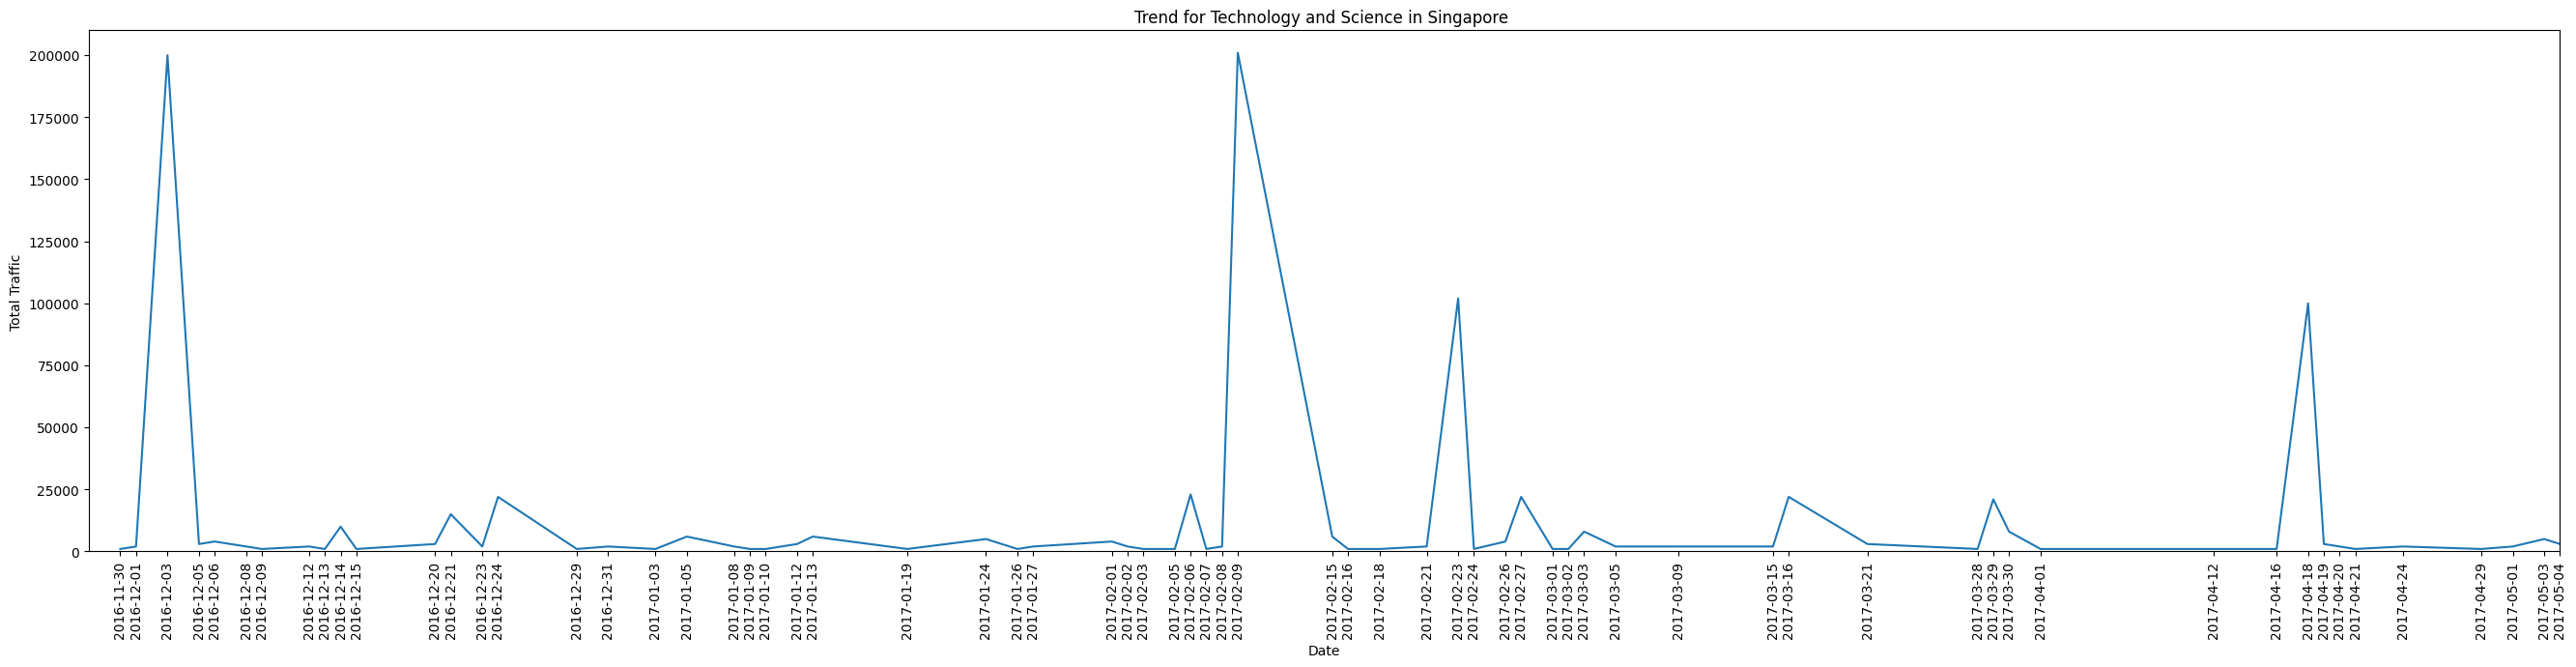

In [23]:
df['date'] = pd.to_datetime(df['date'])
maxTraffic = df['traffic_numeric'].max()

category_time_distribution = df.groupby(['date', 'general_label'])['traffic_numeric'].sum().reset_index(name='total_traffic')
specific_category = clusters[1]
specific_category_data = category_time_distribution[category_time_distribution['general_label'] == specific_category]

plt.figure(figsize=(33, 7))
sns.lineplot(data=specific_category_data, x='date', y='total_traffic')
plt.title(f"Trend for {specific_category} in {country} ")
plt.xlabel("Date")
plt.ylabel("Total Traffic")
plt.xticks(specific_category_data['date'], rotation=90)

plt.ylim(0, maxTraffic+10000)

start_date = pd.to_datetime('2016-11-28')
end_date = pd.to_datetime('2017-05-04')

plt.xlim(start_date, end_date)

plt.show()

In [24]:
df

,date,predicted_label,traffic,general_label,traffic_numeric
0,2016-11-29,tragedy,"10,000+",Accident,10000
1,2016-11-29,crime,"1,000+",Accident,1000
2,2016-11-29,celebrity,"1,000+",Entertainment,1000
3,2016-11-29,celebrity,"200,000+",Entertainment,200000
4,2016-11-29,crime,"1,000+",Accident,1000
...,...,...,...,...,...
1357,2017-05-04,technology,"1,000+",Technology and Science,1000
1358,2017-05-04,history,"5,000+",Intellectualism,5000
1359,2017-05-04,celebrity,"1,000+",Entertainment,1000
1360,2017-05-04,media and entertainment,"1,000+",Entertainment,1000


In [25]:
category_time_distribution

,date,general_label,total_traffic
0,2016-11-29,Accident,12000
1,2016-11-29,Entertainment,201000
2,2016-11-30,Accident,1000
3,2016-11-30,Entertainment,11000
4,2016-11-30,Intellectualism,201000
...,...,...,...
575,2017-05-03,Technology and Science,5000
576,2017-05-04,Accident,2000
577,2017-05-04,Entertainment,33000
578,2017-05-04,Intellectualism,6000


In [26]:
specific_category_data

,date,general_label,total_traffic
6,2016-11-30,Technology and Science,1000
11,2016-12-01,Technology and Science,2000
21,2016-12-03,Technology and Science,200000
30,2016-12-05,Technology and Science,3000
35,2016-12-06,Technology and Science,4000
...,...,...,...
539,2017-04-24,Technology and Science,2000
560,2017-04-29,Technology and Science,1000
568,2017-05-01,Technology and Science,2000
575,2017-05-03,Technology and Science,5000
